## **Import packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

## **Get dataset**

In [2]:
path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(path)

In [3]:
df = pd.read_csv(path) # Read csv
df.head() # Display the first-five rows

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df = df[5::6] # Display the hourly data
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S') # Convert to datetime
df = df.drop(columns=['Date Time']) # Drop datetime column
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<Axes: xlabel='Date Time'>

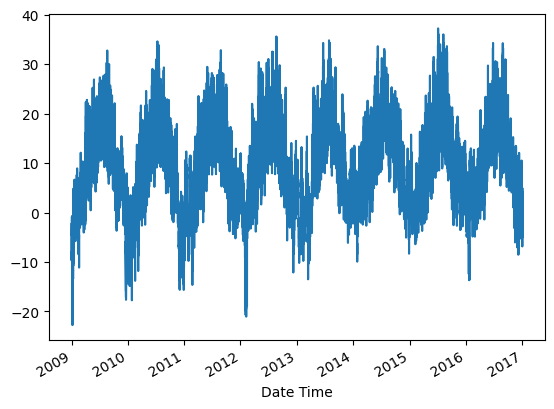

In [6]:
df['T (degC)'].plot() # Plot of the temperature column

In [7]:
df.isna().sum()

,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0
H2OC (mmol/mol),0


In [8]:
# New dataframe for temperature and pressure
temp_p_df = pd.DataFrame({'Temperature': df['T (degC)'], 'Pressure': df['p (mbar)']})

temp_p_df['Seconds'] = temp_p_df.index.map(pd.Timestamp.timestamp) # Convert to seconds
temp_p_df.head()

,Temperature,Pressure,Seconds
Date Time,,,
2009-01-01 01:00:00,-8.05,996.50,1.230772e+09
2009-01-01 02:00:00,-8.88,996.62,1.230775e+09
2009-01-01 03:00:00,-8.81,996.84,1.230779e+09
2009-01-01 04:00:00,-9.05,996.99,1.230782e+09
2009-01-01 05:00:00,-9.63,997.46,1.230786e+09


In [9]:
day = 60*60*24 # Day in seconds
year = day* 365.2423745 # Year in seconds

temp_p_df['Day sin'] = np.sin(temp_p_df['Seconds'] * (2 * np.pi / day)) # Day sin
temp_p_df['Day cos'] = np.cos(temp_p_df['Seconds'] * (2 * np.pi / day)) # Day cos
temp_p_df['Year sin'] = np.sin(temp_p_df['Seconds'] * (2 * np.pi / year)) # Year sin
temp_p_df['Year cos'] = np.cos(temp_p_df['Seconds'] * (2 * np.pi / year)) # Year cos

temp_p_df = temp_p_df.drop(columns=['Seconds']) # Drop seconds column
temp_p_df.head()

,Temperature,Pressure,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,996.50,0.258819,0.965926,0.010133,0.999949
2009-01-01 02:00:00,-8.88,996.62,0.500000,0.866025,0.010850,0.999941
2009-01-01 03:00:00,-8.81,996.84,0.707107,0.707107,0.011567,0.999933
2009-01-01 04:00:00,-9.05,996.99,0.866025,0.500000,0.012284,0.999925
2009-01-01 05:00:00,-9.63,997.46,0.965926,0.258819,0.013000,0.999915


## **Function to create sliding window**

In [10]:
def df_to_x_y(df, window_size=1):
  df_to_np = df.values # Convert dataframe to numpy array

  x = [] # Initialise empty list for input
  y = [] # Initialise empty list for label

  # Create sliding window
  for i in range(len(df_to_np) - window_size):
    input = [a for a in df_to_np[i:i+window_size]] # Window of data (input features)
    label = [df_to_np[i+window_size, 0], df_to_np[i+window_size, 1]] # Next values after window from temperature and pressure column (labels)
    x.append(input)
    y.append(label)

  return np.array(x), np.array(y)  # Convert to numPy arrays

In [11]:
window_size = 7
x, y = df_to_x_y(temp_p_df, window_size) # Call the function to get x and y
x.shape, y.shape

((70084, 7, 6), (70084, 2))

## **Normalization**

In [12]:
temp_min = temp_p_df['Temperature'].min() # Min value of temperature
temp_max = temp_p_df['Temperature'].max() # Max value of temperature
p_min = temp_p_df['Pressure'].min() # Min value of pressure
p_max = temp_p_df['Pressure'].max() # Max value of pressure

# Input array
x[:, :, 0] = (x[:, :, 0] - temp_min) / (temp_max - temp_min) # Normalize temperature
x[:, :, 1] = (x[:, :, 1] - p_min) / (p_max - p_min) # Normalize pressure

# Target array
y[:, 0] = (y[:, 0] - temp_min) / (temp_max - temp_min) # Normalize temperature
y[:, 1] = (y[:, 1] - p_min) / (p_max - p_min) # Normalize pressure

## **Split data into training, validation and testing**

In [13]:
train_size = int(len(x) * .8) # 80% of data for training
p_90 = int(len(x) * .9) # 90% of data

x_train, y_train = x[:train_size], y[:train_size] # Training data
x_val, y_val = x[train_size:p_90], y[train_size:p_90] # Validation data
x_test, y_test = x[p_90:], y[p_90:] # Testing data

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((56067, 7, 6), (56067, 2), (7008, 7, 6), (7008, 2), (7009, 7, 6), (7009, 2))

## **Model development**

In [14]:
model = Sequential() # Initialize the sequential model
model.add(InputLayer((7, 6))) # Input layer
model.add(LSTM(64)) # LSTM layer
model.add(Dense(32, activation='relu')) # First Hidden layer
model.add(Dense(8, activation='relu')) # Second Hidden layer
model.add(Dense(2)) # Output layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,538 (80.23 KB)

 Trainable params: 20,538 (80.23 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
checkpoint = ModelCheckpoint('modelTP.keras', save_best_only=True, monitor='val_loss', mode='min') # Save best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stopping checkpoint

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) # Model compilation

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[checkpoint, early_stopping]) # Model training

Epoch 1/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.0871 - root_mean_squared_error: 0.2690 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0467
Epoch 2/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0361 - val_loss: 6.0045e-04 - val_root_mean_squared_error: 0.0245
Epoch 3/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 5.2281e-04 - root_mean_squared_error: 0.0229 - val_loss: 4.8965e-04 - val_root_mean_squared_error: 0.0221
Epoch 4/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4.4612e-04 - root_mean_squared_error: 0.0211 - val_loss: 3.9402e-04 - val_root_mean_squared_error: 0.0198
Epoch 5/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 3.7635e-04 - root_mean_squared_error: 0.0194 - val_loss: 3.6425e-04 - val_root_mean_squared_error: 0.0191
Epoch 6/50
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.2344e-04 - root_mean_squared_error: 0.0180 - val_loss: 3.3097e-04 - val_root_mean_squared_error: 0.0182


## **Create a function for train, validation and test plots**

In [16]:
def plot_predictions(model, x, y, axes, start, stop):
  y_preds = model.predict(x) # Make predictions
  temp_preds, p_preds = y_preds[:, 0], y_preds[:, 1] # Split predictions into temperature and pressure
  temp_actuals, p_actuals = y[:, 0], y[:, 1] # Split actuals into temperature and pressure

  # Create dataframe of predictions and actual label

  df_preds = pd.DataFrame({'Temperature Predictions': temp_preds,
                           'Temperature Actuals': temp_actuals,
                           'Pressure Predictions': p_preds,
                           'Pressure Actuals': p_actuals})

  # Titles and labels for each axis
  titles = ['Temperature Predictions vs Actuals', 'Pressure Predictions vs Actuals']
  y_labels = ['Temperature', 'Pressure']

  for i, ax in enumerate(axes):
      ax.plot(df_preds[f'{y_labels[i]} Predictions'][start:stop], label=f'{y_labels[i]} Predictions')
      ax.plot(df_preds[f'{y_labels[i]} Actuals'][start:stop], label=f'{y_labels[i]} Actuals')
      ax.set_title(titles[i])  # Set title
      ax.set_xlabel("Number of Periods")  # X-label
      ax.set_ylabel("Values")  # Y-label
      ax.grid(True)  # Display grid
      ax.legend()  # Display legend

  plt.tight_layout()  # Adjust layout for better spacing
  plt.show()  # Display plot

  return df_preds, mse(y, y_preds), mae(y, y_preds)  # Return the DataFrame, MSE, and MAE

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


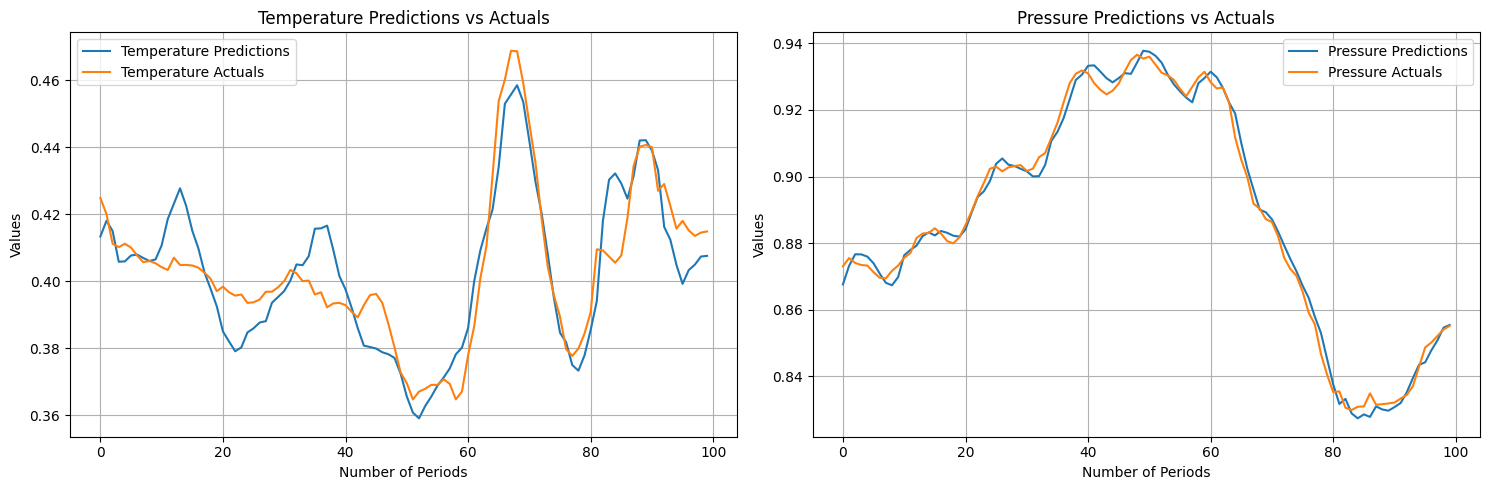

(      Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                    0.413385             0.424883              0.867596   
 1                    0.418101             0.420053              0.873160   
 2                    0.415019             0.411226              0.876648   
 3                    0.405850             0.410227              0.876619   
 4                    0.405965             0.411226              0.875927   
 ...                       ...                  ...                   ...   
 7004                 0.360594             0.362758              0.871474   
 7005                 0.349041             0.355763              0.870565   
 7006                 0.344374             0.333278              0.864542   
 7007                 0.324813             0.330946              0.859664   
 7008                 0.320479             0.313624              0.854570   
 
       Pressure Actuals  
 0             0.873046  
 1             0.87550

In [17]:
# Test plot
f, axes = plt.subplots(1, 2, figsize = (15, 5)) # Specify number of plots rowise and columnwise

plot_predictions(model, x_test, y_test, axes, start=0, stop=100) # Train plot of Temperature

## **Function to undo the scaled mapping**

In [18]:
# Rescale temperature
def temp_rescale(arr):
  arr = arr * (temp_max - temp_min) + temp_min
  return arr

# Rescale pressure
def p_rescale(arr):
  arr = arr * (p_max - p_min) + p_min
  return arr

## **Replot**

In [19]:
def plot_predictions2(model, x, y, axes, start, stop):
  y_preds = model.predict(x) # Make predictions
  temp_preds, p_preds = temp_rescale(y_preds[:, 0]), p_rescale(y_preds[:, 1]) # Split predictions into temperature and pressure
  temp_actuals, p_actuals = temp_rescale(y[:, 0]), p_rescale(y[:, 1]) # Split actuals into temperature and pressure

  # Create dataframe of predictions and actual label

  df_preds = pd.DataFrame({'Temperature Predictions': temp_preds,
                           'Temperature Actuals': temp_actuals,
                           'Pressure Predictions': p_preds,
                           'Pressure Actuals': p_actuals})

  # Titles and labels for each axis
  titles = ['Temperature Predictions vs Actuals', 'Pressure Predictions vs Actuals']
  y_labels = ['Temperature', 'Pressure']

  for i, ax in enumerate(axes):
      ax.plot(df_preds[f'{y_labels[i]} Predictions'][start:stop], label=f'{y_labels[i]} Predictions')
      ax.plot(df_preds[f'{y_labels[i]} Actuals'][start:stop], label=f'{y_labels[i]} Actuals')
      ax.set_title(titles[i])  # Set title
      ax.set_xlabel("Number of Periods")  # X-label
      ax.set_ylabel("Values")  # Y-label
      ax.grid(True)  # Display grid
      ax.legend()  # Display legend

  plt.tight_layout()  # Adjust layout for better spacing
  plt.show()  # Display plot

  return df_preds, mse(y, y_preds), mae(y, y_preds)  # Return the DataFrame, MSE, and MAE

220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


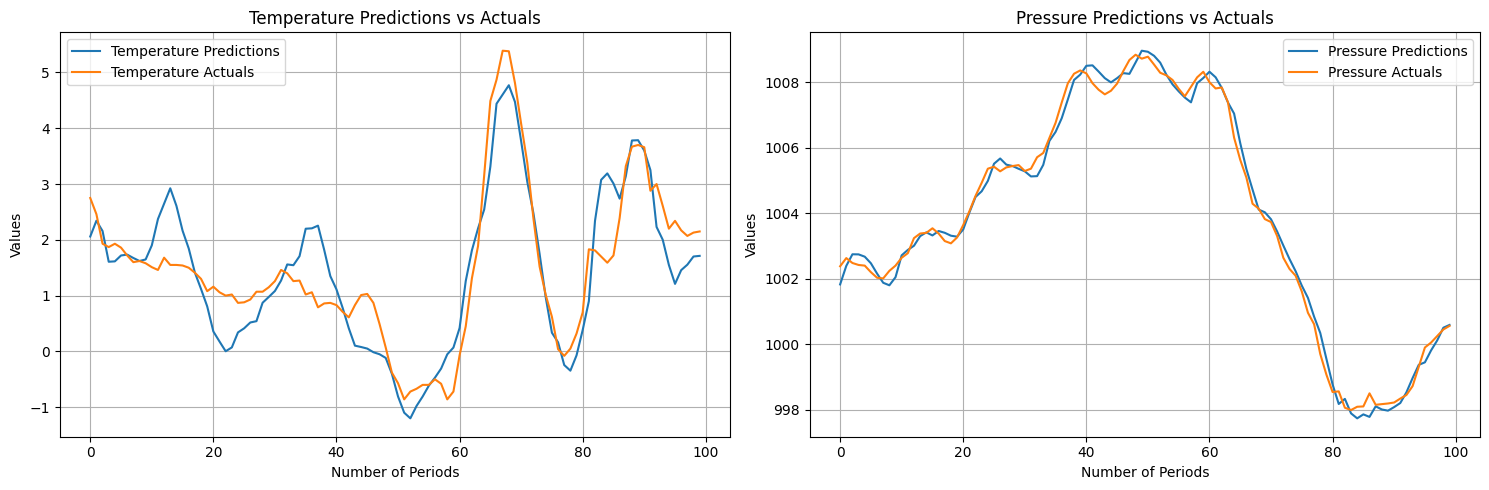

(      Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                    2.059607                 2.75           1001.825745   
 1                    2.342772                 2.46           1002.391602   
 2                    2.157745                 1.93           1002.746338   
 3                    1.607208                 1.87           1002.743286   
 4                    1.614149                 1.93           1002.672974   
 ...                       ...                  ...                   ...   
 7004                -1.109922                -0.98           1002.220154   
 7005                -1.803577                -1.40           1002.127747   
 7006                -2.083784                -2.75           1001.515259   
 7007                -3.258247                -2.89           1001.019226   
 7008                -3.518467                -3.93           1000.501160   
 
       Pressure Actuals  
 0              1002.38  
 1              1002.6

In [20]:
# Train plot
f, axes = plt.subplots(1, 2, figsize = (15, 5)) # Specify number of plots rowise and columnwise

plot_predictions2(model, x_test, y_test, axes, start=0, stop=100) # Train plot of Temperature